In [ ]:
import matplotlib.pyplot as plt
from numpy import absolute
from numpy import mean
from numpy import std
import glob
import os
import re
import numpy as np
import tensorflow as tf
import pandas as pd
import pprint
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import keras.backend as k

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/MyDrive/Thesis/Plots')
myfiles = glob.glob('*.txt')
# print(myfiles)
print(len(myfiles))

Mounted at /content/gdrive
5801


In [ ]:
print(myfiles)

['3_5_23_18_12_3_.txt.txt', '3_15_23_18_12_3_.txt.txt', '3_10_23_18_12_3_.txt.txt', '3_25_23_18_12_3_.txt.txt', '3_20_23_18_12_3_.txt.txt', '8_5_23_18_12_3_.txt.txt', '8_10_23_18_12_3_.txt.txt', '8_20_23_18_12_3_.txt.txt', '8_25_23_18_12_3_.txt.txt', '8_15_23_18_12_3_.txt.txt', '13_10_23_18_12_3_.txt.txt', '13_5_23_18_12_3_.txt.txt', '13_15_23_18_12_3_.txt.txt', '13_25_23_18_12_3_.txt.txt', '13_20_23_18_12_3_.txt.txt', '18_10_23_18_12_3_.txt.txt', '18_5_23_18_12_3_.txt.txt', '18_25_23_18_12_3_.txt.txt', '18_15_23_18_12_3_.txt.txt', '18_20_23_18_12_3_.txt.txt', '22_5_23_18_12_3_.txt.txt', '22_10_23_18_12_3_.txt.txt', '22_20_23_18_12_3_.txt.txt', '22_25_23_18_12_3_.txt.txt', '22_15_23_18_12_3_.txt.txt', '3_5_6_22_12_3_.txt.txt', '3_5_8_22_12_3_.txt.txt', '3_15_6_22_12_3_.txt.txt', '3_10_8_22_12_3_.txt.txt', '3_10_6_22_12_3_.txt.txt', '3_20_6_22_12_3_.txt.txt', '3_15_8_22_12_3_.txt.txt', '3_25_6_22_12_3_.txt.txt', '3_25_8_22_12_3_.txt.txt', '3_20_8_22_12_3_.txt.txt', '8_10_6_22_12_3_.txt.

In [ ]:
list = []
x = []

for ele in myfiles:
    # file = open(ele)
    # content = file.readlines()

    f = open(ele,'r')
    
    # list.append(f)
    for i in f:
        # list.append(i)
        list.append(i)
        # print(i)
    temp = []
    fileName = ele.split('_')
    for i in range(0,6):
      temp.append(float(fileName[i]))

    x.append(temp)
    
# print(list[0])

y = []

for i in list:
  # row = re.split("\\s+", list[j])
  list_ele = re.split("\\s+", i)
  temp = []
  for j in range(100,200):
    temp.append(float(list_ele[j]))
  # print(list_ele)
  y.append(temp)


x = np.array(x)
y = np.array(y)


x = x/25


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

# TO GET SOME DATAPONTS UNSEEN BY MODEL
x = x_val[:116]
y = y_val[:116]

y_d = y

x_val = x_val[116:]
y_val = y_val[116:]

In [ ]:
# df.shape
print(x[0]*25)
print(x[105]*25)
print(x[107]*25)
print(x[112]*25)

[10. 12. 15.  0. 10.  5.]
[18. 10.  8.  8.  8.  5.]
[20. 16. 15. 20.  8.  3.]
[ 5. 12.  5.  0. 10.  3.]


In [ ]:
axs = []
for i in range(1,101):
  axs.append(i)

In [ ]:
#########     USED TO CROSS-CHECK THE PREDICTION OF OUR INVERSE MODEL     #########

# forward_model = DecisionTreeRegressor()
# forward_model.fit(x_train, y_train)
input_size = 6
output_size = 100
hidden_layer_size = 50
    
forward_model_nn = tf.keras.Sequential([
   
    tf.keras.layers.Flatten(input_shape=(6, 1)), # input layer

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    
    # tf.keras.layers.Dense(16, activation='relu'),
    # tf.keras.layers.Dense(64, activation='relu'),
    # tf.keras.layers.Dense(128, activation='relu'),
    # tf.keras.layers.Dense(256, activation='relu'),
    # tf.keras.layers.Dense(256, activation='relu'),
    # tf.keras.layers.Dense(256, activation='relu'),
    # tf.keras.layers.Dense(256, activation='relu'),
    # tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dense(100, activation='linear')
])

forward_model_nn.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

forward_model_nn.fit(x_train, y_train, epochs=200, validation_data=(x_val, y_val))

# ypred_nn = forward_model_nn.predict(x_test)


Epoch 1/200
145/145 [==============================] - 6s 28ms/step - loss: 0.0379 - accuracy: 0.0384 - val_loss: 0.0269 - val_accuracy: 0.0473
Epoch 2/200
145/145 [==============================] - 3s 24ms/step - loss: 0.0237 - accuracy: 0.0565 - val_loss: 0.0200 - val_accuracy: 0.0731
Epoch 3/200
145/145 [==============================] - 4s 27ms/step - loss: 0.0187 - accuracy: 0.0709 - val_loss: 0.0165 - val_accuracy: 0.0753
Epoch 4/200
145/145 [==============================] - 4s 30ms/step - loss: 0.0162 - accuracy: 0.0774 - val_loss: 0.0145 - val_accuracy: 0.0860
Epoch 5/200
145/145 [==============================] - 3s 24ms/step - loss: 0.0144 - accuracy: 0.0907 - val_loss: 0.0128 - val_accuracy: 0.1118
Epoch 6/200
145/145 [==============================] - 4s 25ms/step - loss: 0.0129 - accuracy: 0.1024 - val_loss: 0.0117 - val_accuracy: 0.1204
Epoch 7/200
145/145 [==============================] - 4s 29ms/step - loss: 0.0118 - accuracy: 0.1131 - val_loss: 0.0116 - val_accuracy:

# Reverse Architecture

# With Default Loss-Function

In [ ]:
input_size = 6
output_size = 100
hidden_layer_size = 50

# np.random.seed(42)

reverse_model = tf.keras.Sequential([
   
    tf.keras.layers.Flatten(input_shape=(100, 1)), # input layer
 
    # tf.keras.layers.Dense(16, activation='relu'), # 1st hidden layer
    # tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    
    # tf.keras.layers.Dense(100, input_shape=(6,), activation='relu') # output layer
    
    # tf.keras.layers.Dense(250, activation='relu'),
    # tf.keras.layers.Dense(500, activation='relu'),
    # tf.keras.layers.Dense(250, activation='relu'),
    # tf.keras.layers.Dense(250, activation='relu'),
    # tf.keras.layers.Dense(100, activation='relu'),
    # tf.keras.layers.Dense(50, activation='relu'),
    # tf.keras.layers.Dense(256, activation='relu'),
    # tf.keras.layers.Dense(256, activation='relu'),
    # tf.keras.layers.Dense(128, activation='relu'),
    # tf.keras.layers.Dense(64, activation='relu'),

    tf.keras.layers.Dense(250, activation='relu'),
    # tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(250, activation='relu'),
    # tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50, activation='relu'),
    # tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Dense(6, activation='linear')
])

reverse_model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [ ]:
# history = reverse_model.fit(y_train, x_train, epochs=50, validation_data=(y_val, x_val), batch_size=y_train.shape[0])
history = reverse_model.fit(y_train, x_train, epochs=200, validation_data=(y_val, x_val))
# history = reverse_model.fit(y_train, x_train, epochs=50, validation_data=(y_val, x_val))

Epoch 1/200
145/145 [==============================] - 2s 8ms/step - loss: 0.0508 - accuracy: 0.3787 - val_loss: 0.0390 - val_accuracy: 0.4409
Epoch 2/200
145/145 [==============================] - 1s 7ms/step - loss: 0.0363 - accuracy: 0.4207 - val_loss: 0.0326 - val_accuracy: 0.4129
Epoch 3/200
145/145 [==============================] - 2s 11ms/step - loss: 0.0335 - accuracy: 0.4325 - val_loss: 0.0306 - val_accuracy: 0.4774
Epoch 4/200
145/145 [==============================] - 2s 11ms/step - loss: 0.0316 - accuracy: 0.4580 - val_loss: 0.0296 - val_accuracy: 0.4645
Epoch 5/200
145/145 [==============================] - 1s 10ms/step - loss: 0.0306 - accuracy: 0.4545 - val_loss: 0.0295 - val_accuracy: 0.4194
Epoch 6/200
145/145 [==============================] - 1s 7ms/step - loss: 0.0296 - accuracy: 0.4675 - val_loss: 0.0289 - val_accuracy: 0.4151
Epoch 7/200
145/145 [==============================] - 1s 7ms/step - loss: 0.0287 - accuracy: 0.4662 - val_loss: 0.0290 - val_accuracy: 0.4

In [ ]:
test_loss, test_accuracy = reverse_model.evaluate(y_test, x_test)
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

19/19 [==============================] - 0s 3ms/step - loss: 0.0210 - accuracy: 0.6379
Test loss: 0.02. Test accuracy: 63.79%


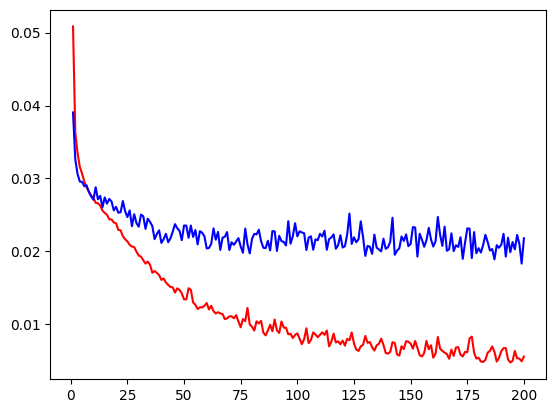

In [ ]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epoch = range(1,201)
plt.plot(epoch,training_loss, 'r', label="Training Loss")
plt.plot(epoch,validation_loss, 'b', label="Validation Loss")
plt.show()

In [ ]:
x_pred = reverse_model.predict(y)
x_pred[22]

4/4 [==============================] - 0s 4ms/step


array([0.86094284, 0.94102407, 0.26986882, 0.54691267, 0.3931308 ,
       0.14413834], dtype=float32)

In [ ]:
x.shape

(116, 6)

In [ ]:
# custom_plot_broad = pd.read_csv('/content/Single_band.csv', header=None)
# custom_plot_broad.columns = ['x','y']
# custom_plot_broad = custom_plot_broad.sort_values(by = 'x')
# custom_plot_broad
# custom_plot_broad = custom_plot_broad['y'].to_numpy()
# custom_plot_broad = custom_plot_broad.reshape(1,-1)
# custom_plot_broad

In [ ]:
# custom_pred_broad = reverse_model.predict(custom_plot_broad)
# custom_pred_broad
# custom_pred_broad_forward = forward_model_nn.predict(custom_pred_broad)
# custom_pred_broad_forward

# plt.plot(axs,custom_pred_broad_forward[0],'r', label="Predicted")
# plt.plot(axs,custom_plot_broad[0],'b', label="Original")
# plt.legend()
# plt.show()

In [ ]:
mse1 = mean_squared_error(x, x_pred)
mse1

0.02818037669930361

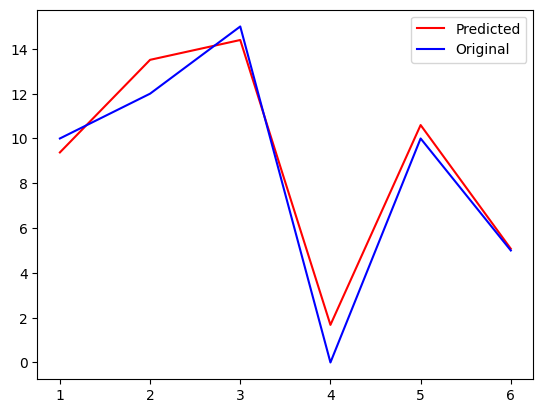

[ 9.377036  13.510992  14.396172   1.6779203 10.599625   5.0764947]
1/1 [==============================] - 0s 94ms/step


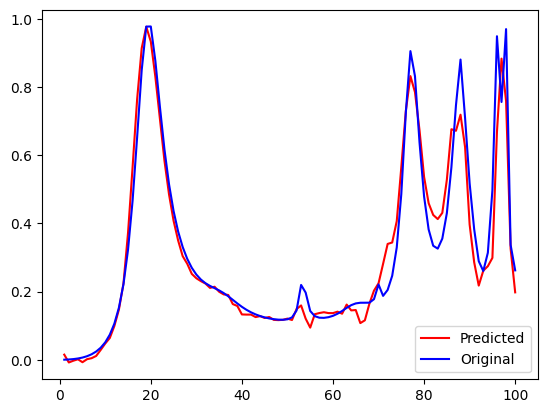

In [ ]:
a = [1,2,3,4,5,6]
plt.plot(a,x_pred[0]*25,'r', label="Predicted")
plt.plot(a,x[0]*25,'b', label="Original")
plt.legend()
plt.show()
print(x_pred[0]*25)

x_0 = x_pred[0].reshape(1,-1)
final_pred_2 = forward_model_nn.predict(x_0)
plt.plot(axs,final_pred_2[0],'r', label="Predicted")
plt.plot(axs,y[0],'b', label="Original")
plt.legend()
plt.show()

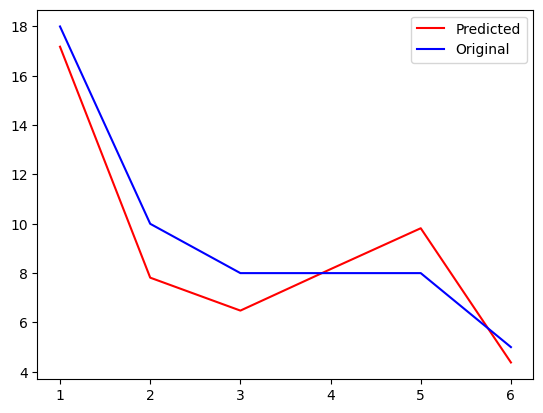

[17.179611   7.81583    6.4805284  8.160867   9.819465   4.3769403]
1/1 [==============================] - 0s 24ms/step


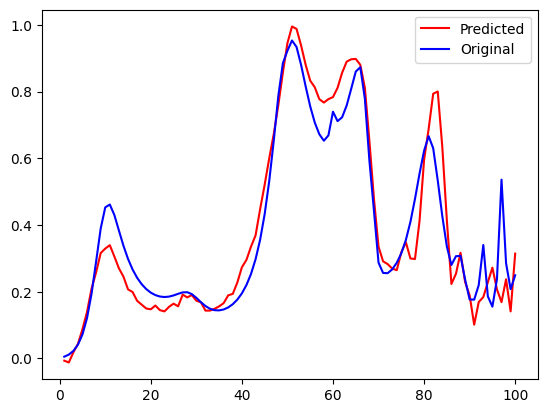

In [ ]:
a = [1,2,3,4,5,6]
plt.plot(a,x_pred[105]*25,'r', label="Predicted")
plt.plot(a,x[105]*25,'b', label="Original")
plt.legend()
plt.show()
print(x_pred[105]*25)

x_105 = x_pred[105].reshape(1,-1)
final_pred_3 = forward_model_nn.predict(x_105)
plt.plot(axs,final_pred_3[0],'r', label="Predicted")
plt.plot(axs,y[105],'b', label="Original")
plt.legend()
plt.show()

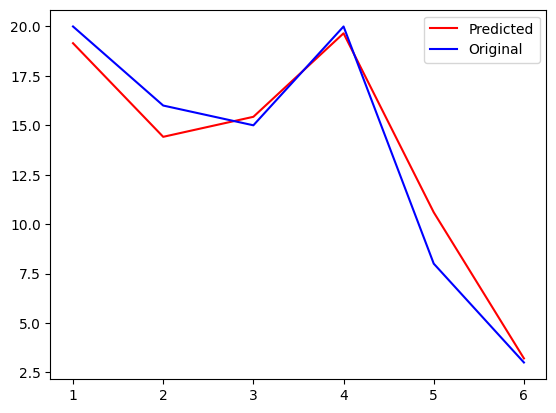

[19.153618  14.417007  15.429822  19.65465   10.596803   3.2059603]
1/1 [==============================] - 0s 23ms/step


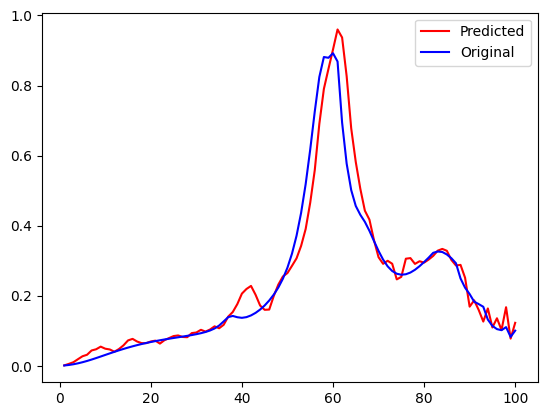

In [ ]:
a = [1,2,3,4,5,6]
plt.plot(a,x_pred[107]*25,'r', label="Predicted")
plt.plot(a,x[107]*25,'b', label="Original")
plt.legend()
plt.show()
print(x_pred[107]*25)

x_107 = x_pred[107].reshape(1,-1)
final_pred_2 = forward_model_nn.predict(x_107)
plt.plot(axs,final_pred_2[0],'r', label="Predicted")
plt.plot(axs,y[107],'b', label="Original")
plt.legend()
plt.show()

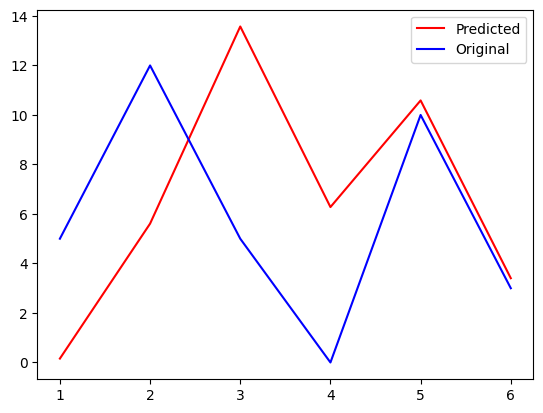

[ 0.15747286  5.6084647  13.574367    6.278528   10.586532    3.4043972 ]
1/1 [==============================] - 0s 26ms/step


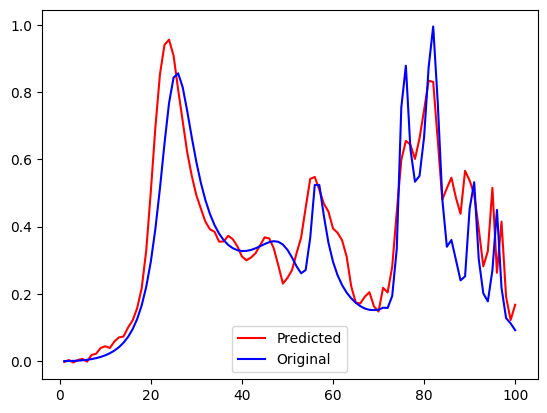

In [ ]:
a = [1,2,3,4,5,6]
plt.plot(a,x_pred[112]*25,'r', label="Predicted")
plt.plot(a,x[112]*25,'b', label="Original")
plt.legend()
plt.show()
print(x_pred[112]*25)

x_112 = x_pred[112].reshape(1,-1)
final_pred_2 = forward_model_nn.predict(x_112)
plt.plot(axs,final_pred_2[0],'r', label="Predicted")
plt.plot(axs,y[112],'b', label="Original")
plt.legend()
plt.show()

# With Customized Loss-Function




In [ ]:
# y_train

In [ ]:
# print(yNumpyTrain)
y_train.shape

(4640, 100)

In [ ]:
# def custom_loss(y_true, y_pred):

#     error = y_true-y_pred
#     sqr_error = k.square(error)
#     # mean_sqr_error = tf.math.reduce_mean(sqr_error)
#     mean_sqr_error = k.sum(sqr_error)
        
#     return mean_sqr_error

# def custom_loss(y_true, y_pred, y_train):
#     # y_pred_forward = forward_model.predict(y_pred)
#     # y_true_forward = forward_model.predict(y_true)
#     # error = y_pred_forward - y_true_forward

#     # error = y_train - y_pred
#     # sqr_error = tf.square(error)
#     # mean_sqr_error = tf.math.reduce_mean(sqr_error)
#     # loss = k.sum(mean_sqr_error)

#     # inverse_loss = tf.keras.losses.mean_squared_error(y_true, y_pred)
#     # forward_loss = tf.keras.losses.mean_squared_error(y_true_forward, y_pred_forward)
#     # loss = inverse_loss * forward_loss

#     y_pred_forward = forward_model.predict(y_pred.numpy())
#     # loss = tf.keras.losses.mean_squared_error(y_train, y_pred_forward)
#     # error = y_train - y_pred_forward
#     error = y_train - y_pred_forward
#     sqr_error = tf.square(error)
#     mean_sqr_error = tf.math.reduce_mean(sqr_error)
#     loss = k.sum(mean_sqr_error)
#     # print(y_pred)


#     return loss


def custom_loss(y_train):
    
    def lossFunction(y_true,y_pred):    
        y_pred_forward = forward_model_nn(y_pred)
        # error = y_train-y_pred_forward
        # sqr_error = tf.square(error)
        # mean_sqr_error = tf.math.reduce_mean(sqr_error)
        loss1 = tf.keras.losses.mean_squared_error(y_train, y_pred_forward)
        loss2 = tf.keras.losses.mean_squared_error(y_true, y_pred)
        # loss2_ = tf.cast(loss2, dtype=tf.float64)
        # tf.cast(loss1, 'float32')
        # tf.cast(loss2, 'float32')
        mean_sqr_error = tf.add(loss1,loss2)
        mean_sqr_error = mean_sqr_error/2
        return mean_sqr_error

    return lossFunction

################################################################################

input_size = 6
output_size = 100
hidden_layer_size = 50
    
custom_reverse_model = tf.keras.Sequential([
   
    tf.keras.layers.Flatten(input_shape=(100, 1)), # input layer

    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50, activation='relu'),

    tf.keras.layers.Dense(6, activation='linear')
])

# custom_reverse_model.compile(optimizer='adam', loss=custom_loss(y_train), metrics=['accuracy'], run_eagerly=True)
custom_reverse_model.compile(optimizer='adam', loss=custom_loss(y_train), metrics=['accuracy'])
# custom_reverse_model.compile(optimizer='adam', loss=lambda y_true, y_pred: custom_loss(y_true, y_pred, y_train), metrics=['accuracy'], run_eagerly=True)

In [ ]:
y_train.shape[0]

4640

In [ ]:
# history1 = custom_reverse_model.fit(y_train, x_train, epochs=10, validation_data=(y_val, x_val))
history1 = custom_reverse_model.fit(y_train, x_train, epochs=200, batch_size=y_train.shape[0])
# history1 = custom_reverse_model.fit(y_train, x_train, epochs=200, validation_data=(y_val, x_val), batch_size=y_train.shape[0], validation_batch_size=1)

Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 0.1768 - accuracy: 0.1892
Epoch 2/200
1/1 [==============================] - 1s 1s/step - loss: 0.1240 - accuracy: 0.2554
Epoch 3/200
1/1 [==============================] - 1s 934ms/step - loss: 0.0960 - accuracy: 0.2599
Epoch 4/200
1/1 [==============================] - 1s 930ms/step - loss: 0.0970 - accuracy: 0.2597
Epoch 5/200
1/1 [==============================] - 1s 625ms/step - loss: 0.0867 - accuracy: 0.2696
Epoch 6/200
1/1 [==============================] - 1s 520ms/step - loss: 0.0776 - accuracy: 0.2776
Epoch 7/200
1/1 [==============================] - 1s 538ms/step - loss: 0.0756 - accuracy: 0.3080
Epoch 8/200
1/1 [==============================] - 1s 520ms/step - loss: 0.0746 - accuracy: 0.3330
Epoch 9/200
1/1 [==============================] - 1s 559ms/step - loss: 0.0750 - accuracy: 0.3360
Epoch 10/200
1/1 [==============================] - 1s 548ms/step - loss: 0.0742 - accuracy: 0.3353
Epoch 11/200
1/

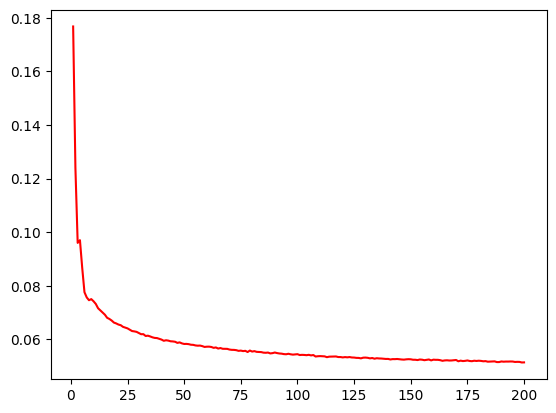

In [ ]:
training_loss1 = history1.history['loss']
# validation_loss1 = history1.history['val_loss']
epoch = range(1,201)
plt.plot(epoch,training_loss1, 'r', label="Training Loss")
# plt.plot(epoch,validation_loss1, 'b', label="Validation Loss")
plt.show()

In [ ]:
x_pred_custom = custom_reverse_model.predict(y)
mse2 = mean_squared_error(x, x_pred_custom)
print(mse2)

4/4 [==============================] - 0s 3ms/step
0.036791014600730185


In [ ]:
# x_pred_custom

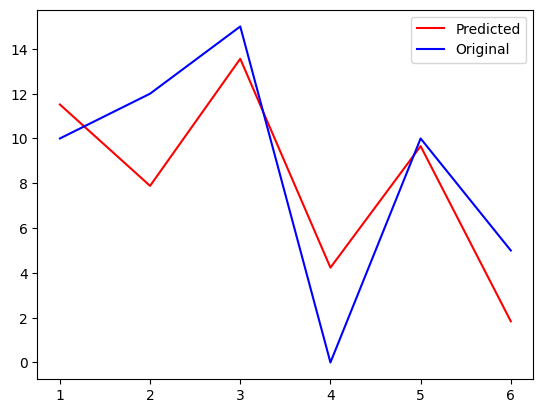

[11.516677   7.884554  13.558481   4.234147   9.656949   1.8386403]
1/1 [==============================] - 0s 24ms/step


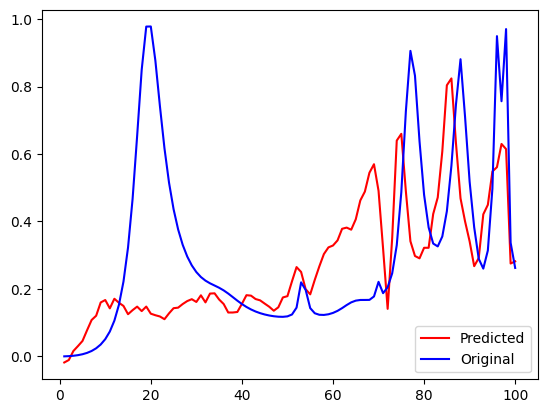

In [ ]:
a = [1,2,3,4,5,6]
plt.plot(a,x_pred_custom[0]*25,'r', label="Predicted")
plt.plot(a,x[0]*25,'b', label="Original")
plt.legend()
plt.show()
print(x_pred_custom[0]*25)

x_0 = x_pred_custom[0].reshape(1,-1)
final_pred_2_custom = forward_model_nn.predict(x_0)
plt.plot(axs,final_pred_2_custom[0],'r', label="Predicted")
plt.plot(axs,y[0],'b', label="Original")
plt.legend()
plt.show()

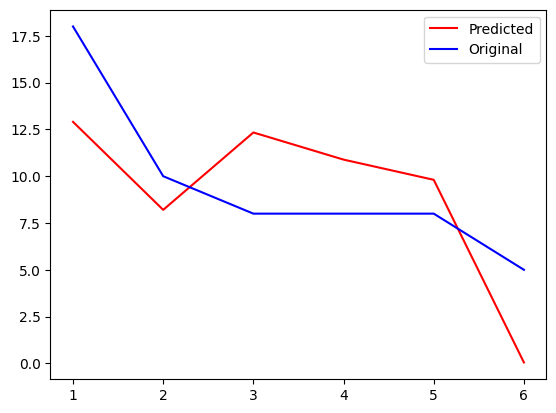

[12.904867    8.202839   12.336664   10.886964    9.807435    0.04834566]
1/1 [==============================] - 0s 23ms/step


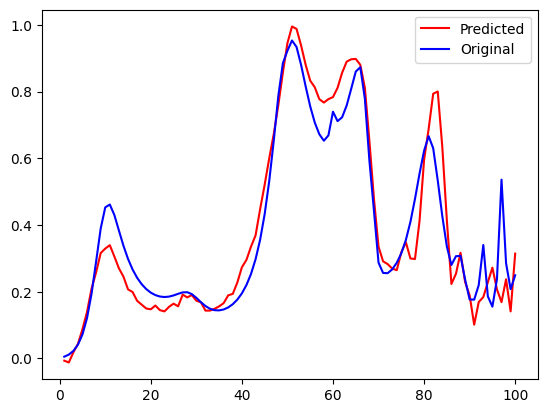

In [ ]:
a = [1,2,3,4,5,6]
plt.plot(a,x_pred_custom[105]*25,'r', label="Predicted")
plt.plot(a,x[105]*25,'b', label="Original")
plt.legend()
plt.show()
print(x_pred_custom[105]*25)

x_105 = x_pred[105].reshape(1,-1)
final_pred_2_custom = forward_model_nn.predict(x_105)
plt.plot(axs,final_pred_2_custom[0],'r', label="Predicted")
plt.plot(axs,y[105],'b', label="Original")
plt.legend()
plt.show()

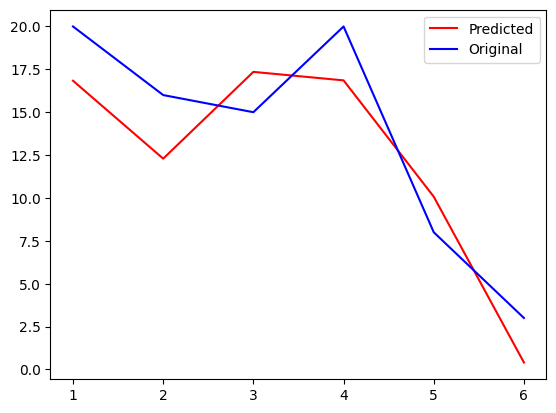

[16.834864   12.292792   17.352201   16.856743   10.073996    0.40500677]
1/1 [==============================] - 0s 22ms/step


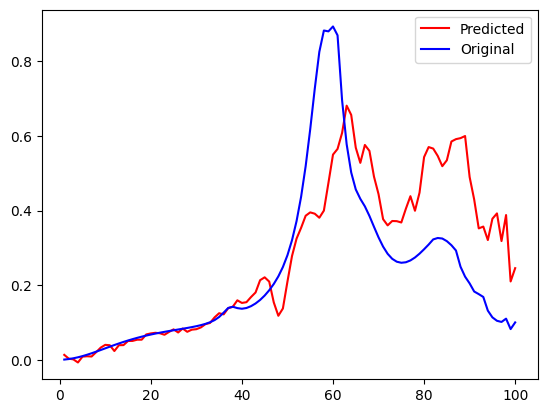

In [ ]:
a = [1,2,3,4,5,6]
plt.plot(a,x_pred_custom[107]*25,'r', label="Predicted")
plt.plot(a,x[107]*25,'b', label="Original")
plt.legend()
plt.show()
print(x_pred_custom[107]*25)

x_107 = x_pred_custom[107].reshape(1,-1)
final_pred_2_custom = forward_model_nn.predict(x_107)
plt.plot(axs,final_pred_2_custom[0],'r', label="Predicted")
plt.plot(axs,y[107],'b', label="Original")
plt.legend()
plt.show()

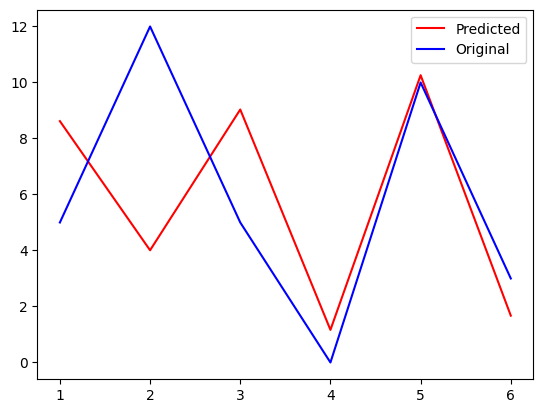

[ 8.619164   4.0077176  9.03429    1.1639465 10.259443   1.6723117]
1/1 [==============================] - 0s 22ms/step


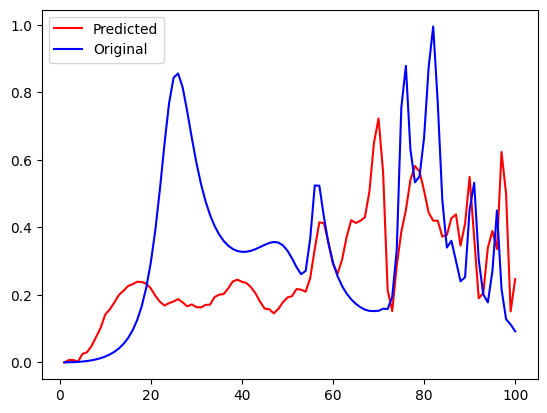

In [ ]:
a = [1,2,3,4,5,6]
plt.plot(a,x_pred_custom[112]*25,'r', label="Predicted")
plt.plot(a,x[112]*25,'b', label="Original")
plt.legend()
plt.show()
print(x_pred_custom[112]*25)

x_112 = x_pred_custom[112].reshape(1,-1)
final_pred_2_custom = forward_model_nn.predict(x_112)
plt.plot(axs,final_pred_2_custom[0],'r', label="Predicted")
plt.plot(axs,y[112],'b', label="Original")
plt.legend()
plt.show()

In [ ]:
# x_ = x[:4640]
# y_ = y[:4640]

In [ ]:
# test_loss1, test_accuracy1 = custom_reverse_model.evaluate(y_, x_, batch_size=4640)
# print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss1, test_accuracy1*100.))

In [ ]:

# data

# COMSOL Prediction

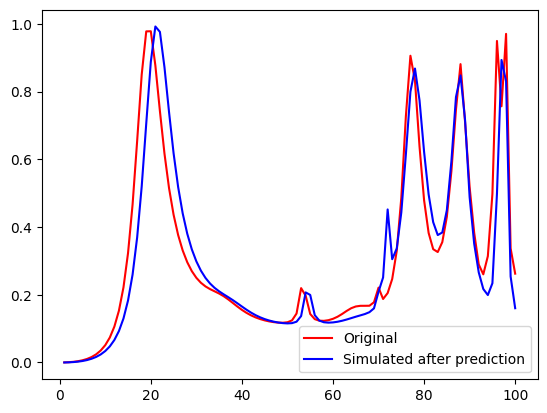

In [ ]:
f = open("/content/ 7.709119300000001_13.291186_13.32947_0.89571846_10.318754_4.9397693_.txt.txt", "r")
data = f.readline()

y1 = []

list_ele = re.split("\\s+", data)
temp = []
for j in range(100,200):
  temp.append(float(list_ele[j]))
# print(list_ele)
y1.append(temp)


# x = np.array(x)
y1 = np.array(y1)
# y1
# x = x/25
plt.plot(axs,y_d[0],'r', label="Original")
plt.plot(axs,y1[0],'b', label="Simulated after prediction")
plt.legend()
plt.show()

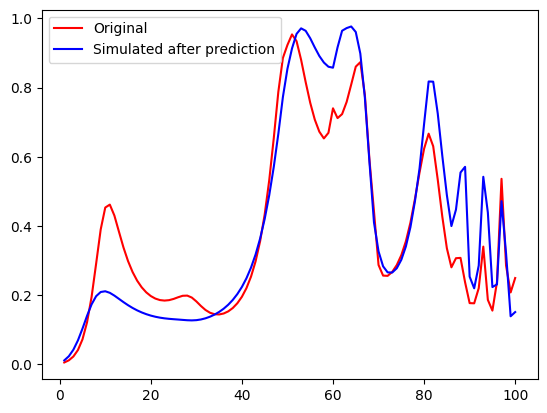

In [ ]:
f = open("/content/ 17.411242_9.209313_5.916762_9.461546_10.443375_4.257351_.txt.txt", "r")
data = f.readline()

y1 = []

list_ele = re.split("\\s+", data)
temp = []
for j in range(100,200):
  temp.append(float(list_ele[j]))
# print(list_ele)
y1.append(temp)


# x = np.array(x)
y1 = np.array(y1)
# y1
# x = x/25
plt.plot(axs,y_d[105],'r', label="Original")
plt.plot(axs,y1[0],'b', label="Simulated after prediction")
plt.legend()
plt.show()

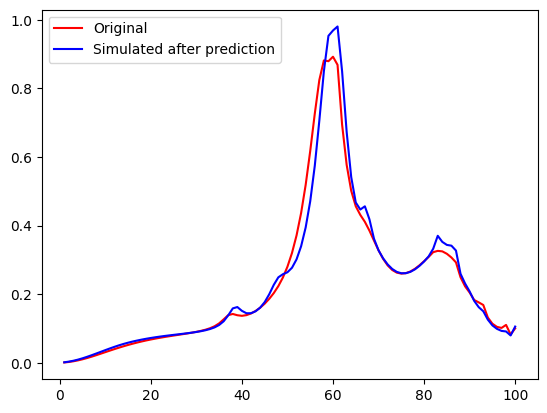

In [ ]:
f = open("/content/ 20.544884_15.314195_16.999033_19.198772_9.201803_3.189993_.txt.txt", "r")
data = f.readline()

y1 = []

list_ele = re.split("\\s+", data)
temp = []
for j in range(100,200):
  temp.append(float(list_ele[j]))
# print(list_ele)
y1.append(temp)


# x = np.array(x)
y1 = np.array(y1)
# y1
# x = x/25
plt.plot(axs,y_d[107],'r', label="Original")
plt.plot(axs,y1[0],'b', label="Simulated after prediction")
plt.legend()
plt.show()

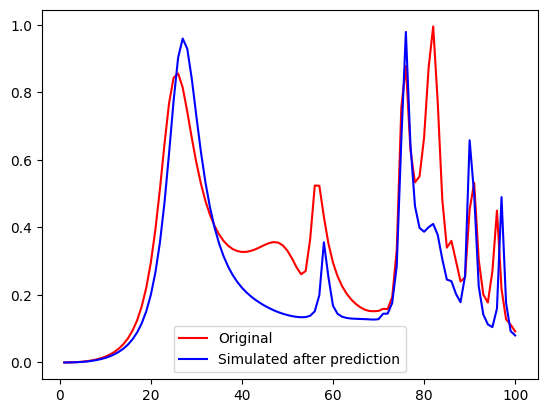

In [ ]:
f = open("/content/ 2.0396426_7.317445_10.023222_3.5793915_11.092337_3.5183673_.txt.txt", "r")
data = f.readline()

y1 = []

list_ele = re.split("\\s+", data)
temp = []
for j in range(100,200):
  temp.append(float(list_ele[j]))
# print(list_ele)
y1.append(temp)


# x = np.array(x)
y1 = np.array(y1)
# y1
# x = x/25
plt.plot(axs,y_d[112],'r', label="Original")
plt.plot(axs,y1[0],'b', label="Simulated after prediction")
plt.legend()
plt.show()

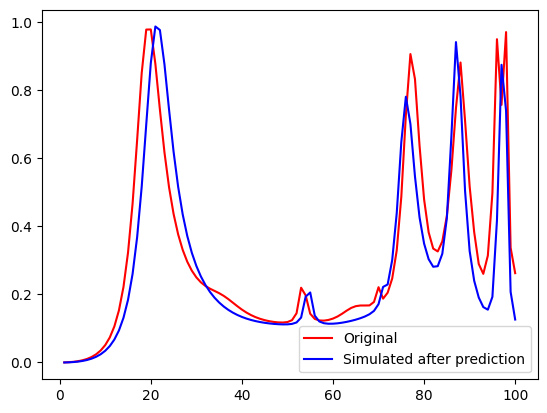

In [ ]:
f = open("/content/ 4.28754639_12.64445095_13.46311242_3.75964108_10.9793_4.52071521_.txt.txt", "r")
data = f.readline()

y1 = []

list_ele = re.split("\\s+", data)
temp = []
for j in range(100,200):
  temp.append(float(list_ele[j]))
# print(list_ele)
y1.append(temp)


# x = np.array(x)
y1 = np.array(y1)
# y1
# x = x/25
plt.plot(axs,y_d[0],'r', label="Original")
plt.plot(axs,y1[0],'b', label="Simulated after prediction")
plt.legend()
plt.show()

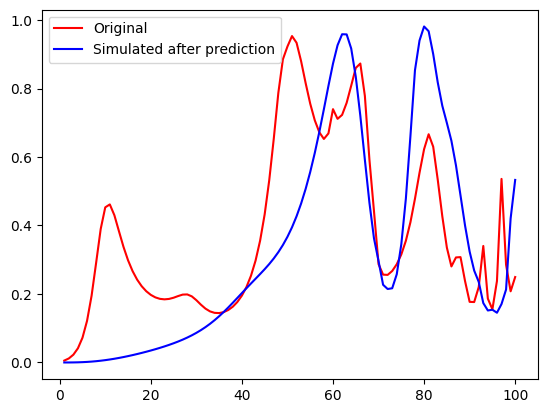

In [ ]:
f = open("/content/ 13.1610155_7.607541_11.645532_10.424612_13.304255_0.5708138_.txt.txt", "r")
data = f.readline()

y1 = []

list_ele = re.split("\\s+", data)
temp = []
for j in range(100,200):
  temp.append(float(list_ele[j]))
# print(list_ele)
y1.append(temp)


# x = np.array(x)
y1 = np.array(y1)
# y1
# x = x/25
plt.plot(axs,y_d[105],'r', label="Original")
plt.plot(axs,y1[0],'b', label="Simulated after prediction")
plt.legend()
plt.show()

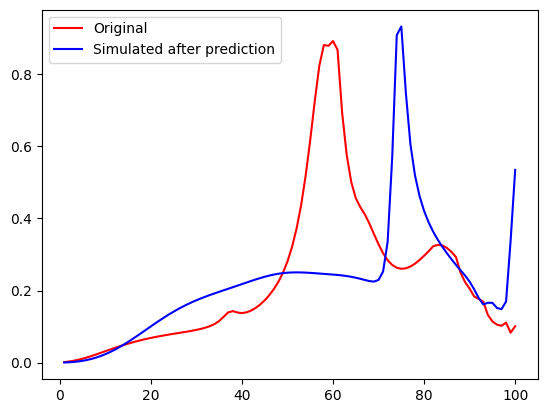

In [ ]:
f = open("/content/ 16.834864_12.292792_17.352201_16.856743_10.073996_0.40500677_.txt.txt", "r")
data = f.readline()

y1 = []

list_ele = re.split("\\s+", data)
temp = []
for j in range(100,200):
  temp.append(float(list_ele[j]))
# print(list_ele)
y1.append(temp)


# x = np.array(x)
y1 = np.array(y1)
# y1
# x = x/25
plt.plot(axs,y_d[107],'r', label="Original")
plt.plot(axs,y1[0],'b', label="Simulated after prediction")
plt.legend()
plt.show()

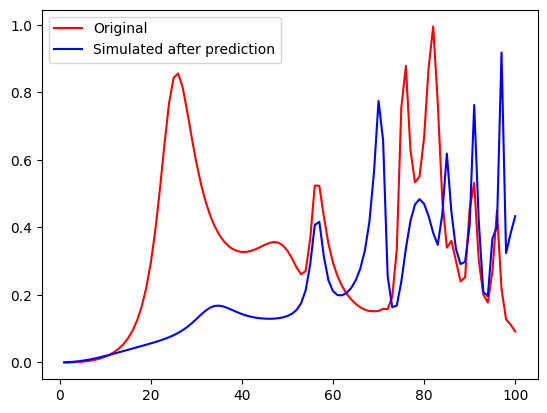

In [ ]:
f = open("/content/ 8.353336_3.9925613000000006_9.926472_1.343393_10.707131_1.7172426_.txt.txt", "r")
data = f.readline()

y1 = []

list_ele = re.split("\\s+", data)
temp = []
for j in range(100,200):
  temp.append(float(list_ele[j]))
# print(list_ele)
y1.append(temp)


# x = np.array(x)
y1 = np.array(y1)
# y1
# x = x/25
plt.plot(axs,y_d[112],'r', label="Original")
plt.plot(axs,y1[0],'b', label="Simulated after prediction")
plt.legend()
plt.show()